# View the dataset

In [7]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.linalg import inv,pinvh,eig,eigh
from scipy.stats import linregress
%matplotlib inline

# COMPARISON WITH FRACTIONAL POWER

In [110]:
# Matrice opérateur
a   = 0.5
nx  = 2000
dx  = 1/nx
m   = 500
T   = np.tri(nx)

#### EXPLICIT

In [189]:
Ta1 = np.zeros((nx,nx))
for i in range(nx):
    for j in range(nx):
        if j<i:
            Ta1[i,j]=1/a*1/(a+1)*dx**(a+1)*(2*(i-j)**(a+1)-(i-j+1)**(a+1)-(i-j-1)**(a+1))
        elif i==j:
            Ta1[i,j]=1/a*dx**(a)*((i-j+1)**a-(i-j)**a)
            
#Ta1 = 0.25*np.transpose(Ta1).dot(Ta1)

#### AS A POWER OF a=1

In [190]:
def power(M,r) :
        D,P = eigh(M)
        D   = np.diag(D**r)
        return P.dot(D).dot(np.transpose(P))
T   = dx*np.tri(nx)
tTT = np.transpose(T).dot(T)
Ta2 = power(tTT,a/2)

#### IN EIGENVALUES BASIS

In [191]:
base       = np.zeros((m,nx))        
eigm       = ((np.linspace(0,m-1,m)+1/2)*np.pi).reshape(-1,1)
v1         = ((2*np.linspace(0,nx-1,nx)+1)*dx/2).reshape(1,-1)
v2         = (np.ones(nx)/2*dx).reshape(1,-1)
base       = 2*np.sqrt(2)/eigm*np.cos(v1*eigm)*np.sin(v2*eigm)
Ta3        = np.diag(((np.linspace(0,m-1,m)+1/2)*np.pi)**(-2*a))
Ta3        = nx*np.transpose(base).dot(Ta3).dot(base)
#Ta3        = np.transpose(Ta3).dot(Ta3)

#### COMPUTE AND PLOT

In [192]:
t  = np.linspace(0,1-1/nx,nx)
x  = np.exp(-(t-0.5)**2/0.1**2)
y1 = Ta1.dot(x)
y2 = Ta2.dot(x)
y3 = Ta3.dot(x)

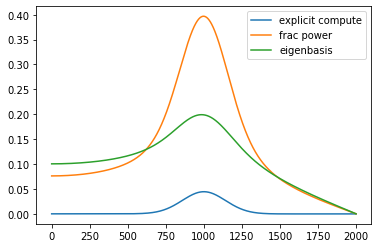

In [193]:
plt.plot(y1,label="explicit compute")
plt.plot(y2,label="frac power")
plt.plot(y3,label="eigenbasis")
plt.legend()